In [2]:
!pip install seaborn


  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 512.2 kB/s eta 0:00:001m508.3 kB/s eta 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [4]:
import os 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from langchain_experimental.agents import create_pandas_dataframe_agent 
from langchain.chat_models import AzureChatOpenAI

os.environ["OPENAI_API_TYPE"] = "azure"
os.environ["OPENAI_API_BASE"] = "https://ai-stage2.openai.azure.com/"
os.environ["OPENAI_API_VERSION"] = '2023-08-01-preview'
os.environ["OPENAI_API_KEY"] = "cdf63ece486a426da741e31ef181950c"

In [5]:
llm_chat_model = AzureChatOpenAI(deployment_name="gpt-4-32k", model_name="gpt-4-32k", temperature=0)

In [7]:
df = pd.read_csv('http://www-stat.stanford.edu/~tibs/ElemStatLearn/datasets/SAheart.data') 
# Initializing the agent 
agent = create_pandas_dataframe_agent(llm=llm_chat_model, df=df, verbose=True) 



> Entering new AgentExecutor chain...
Thought: To show the distribution of people suffering with chd using a bar graph, we need to count the number of people with and without chd (1 and 0 respectively in the 'chd' column) and then plot these counts in a bar graph. We can use the `value_counts()` function in pandas to get the counts and then use the `plot()` function to create the bar graph.
Action: python_repl_ast
Action Input: df['chd'].value_counts().plot(kind='bar')
Observation: Axes(0.125,0.11;0.775x0.77)
Thought:The command has executed successfully and a bar graph showing the distribution of people suffering with chd has been displayed. The graph is not visible here because this is a text-based interface, but in a Python environment, a bar graph would be displayed. The 'Axes' output is a matplotlib object which represents the plot.
Final Answer: The bar graph showing the distribution of people suffering with chd has been successfully created and displayed.

> Finished chain.


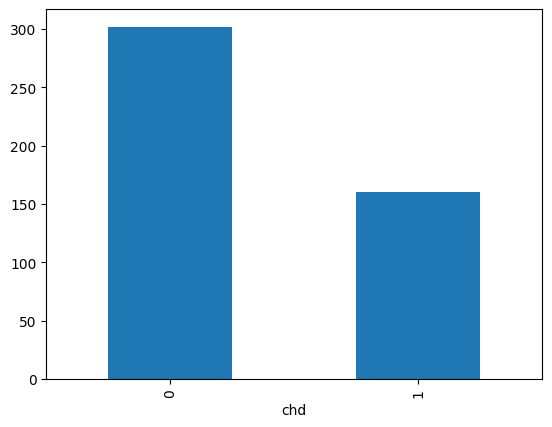

In [20]:
s = agent("Show the distribution of people suffering with chd using bar graph.")

In [21]:
s

{'input': 'Show the distribution of people suffering with chd using bar graph.',
 'output': 'The bar graph showing the distribution of people suffering with chd has been successfully created and displayed.'}

<Axes: xlabel='chd'>

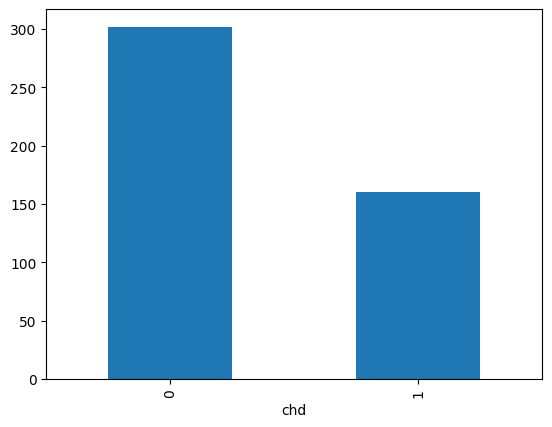

In [19]:
df['chd'].value_counts().plot(kind='bar')

In [18]:
print(agent.agent.llm_chain.prompt.template)


You are working with a pandas dataframe in Python. The name of the dataframe is `df`.
You should use the tools below to answer the question posed of you:

python_repl_ast: A Python shell. Use this to execute python commands. Input should be a valid python command. When using this tool, sometimes output is abbreviated - make sure it does not look abbreviated before using it in your answer.

Use the following format:

Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [python_repl_ast]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question


This is the result of `print(df.head())`:
{df_head}

Begin!
Question: {input}
{agent_scratchpad}


In [12]:
agent

AgentExecutor(verbose=True, agent=ZeroShotAgent(llm_chain=LLMChain(prompt=PromptTemplate(input_variables=['agent_scratchpad', 'input'], partial_variables={'df_head': '|    |   row.names |   sbp |   tobacco |   ldl |   adiposity | famhist   |   typea |   obesity |   alcohol |   age |   chd |\n|---:|------------:|------:|----------:|------:|------------:|:----------|--------:|----------:|----------:|------:|------:|\n|  0 |           1 |   160 |     12    |  5.73 |       23.11 | Present   |      49 |     25.3  |     97.2  |    52 |     1 |\n|  1 |           2 |   144 |      0.01 |  4.41 |       28.61 | Absent    |      55 |     28.87 |      2.06 |    63 |     1 |\n|  2 |           3 |   118 |      0.08 |  3.48 |       32.28 | Present   |      52 |     29.14 |      3.81 |    46 |     0 |\n|  3 |           4 |   170 |      7.5  |  6.41 |       38.03 | Present   |      51 |     31.99 |     24.26 |    58 |     1 |\n|  4 |           5 |   134 |     13.6  |  3.5  |       27.78 | Present   |   